11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7923 - loss: 0.6382 - val_accuracy: 0.9826 - val_loss: 0.0557
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9685 - loss: 0.1091 - val_accuracy: 0.9887 - val_loss: 0.0341
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9790 - loss: 0.0736 - val_accuracy: 0.9882 - val_loss: 0.0373
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9837 - loss: 0.0571 - val_accuracy: 0.9906 - val_loss: 0.0296
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9857 - loss: 0.0509 - val_accuracy: 0.9920 - val_loss: 0.0280
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9877 - loss: 0.0416 - val_accuracy: 0.9803 - val_loss: 0.0796
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9888 - loss: 0.0369 - val_accuracy: 0.9912 - val_loss: 0.0338
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9898 - loss: 0.0338 - val_accuracy: 0

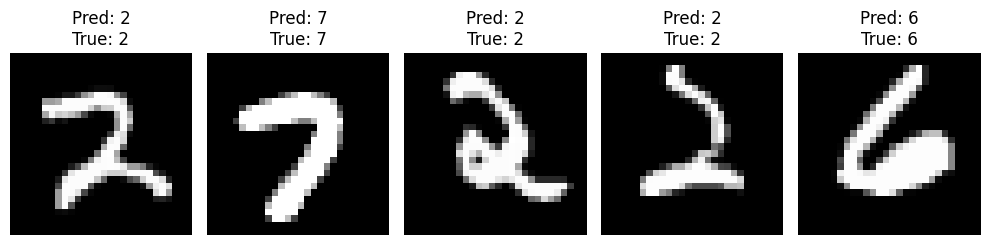

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

# Load and preprocess the MNIST dataset
def load_and_preprocess_data():
    # Load the MNIST dataset
    (X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

    # Normalize pixel values to be between 0 and 1
    X_train = X_train.astype('float32') / 255.0
    X_test = X_test.astype('float32') / 255.0

    # Reshape images to include channel dimension for CNN input
    X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
    X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

    # Convert labels to categorical
    y_train = keras.utils.to_categorical(y_train)
    y_test = keras.utils.to_categorical(y_test)

    return X_train, y_train, X_test, y_test

# Build the CNN model
def create_cnn_model():
    model = models.Sequential([
        # First Convolutional Layer
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),

        # Second Convolutional Layer
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        # Third Convolutional Layer
        layers.Conv2D(64, (3, 3), activation='relu'),

        # Flatten the 2D feature maps for fully connected layers
        layers.Flatten(),

        # Fully Connected Layers
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.5),

        # Output Layer
        layers.Dense(10, activation='softmax')
    ])

    return model

# Train the model
def train_model(model, X_train, y_train, X_test, y_test):
    # Compile the model
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, y_train,
                        epochs=10,
                        batch_size=64,
                        validation_data=(X_test, y_test))

    return history

# Evaluate the model
def evaluate_model(model, X_test, y_test):
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    print(f'Test accuracy: {test_accuracy * 100:.2f}%')
    return test_loss, test_accuracy

# Visualize predictions
def visualize_predictions(model, X_test, y_test, num_samples=5):
    # Make predictions
    predictions = model.predict(X_test)

    # Plot some example predictions
    plt.figure(figsize=(10, 3))
    for i in range(num_samples):
        # Select a random test image
        idx = np.random.randint(0, len(X_test))

        # Prepare subplot
        plt.subplot(1, num_samples, i+1)
        plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')

        # Get predicted and true labels
        pred_label = np.argmax(predictions[idx])
        true_label = np.argmax(y_test[idx])

        # Set title with prediction and true label
        plt.title(f'Pred: {pred_label}\nTrue: {true_label}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Main execution
def main():
    # Load and preprocess data
    X_train, y_train, X_test, y_test = load_and_preprocess_data()

    # Create the CNN model
    model = create_cnn_model()

    # Print model summary
    model.summary()

    # Train the model
    history = train_model(model, X_train, y_train, X_test, y_test)

    # Evaluate the model
    evaluate_model(model, X_test, y_test)

    # Visualize some predictions
    visualize_predictions(model, X_test, y_test)

    return model, history

# Run the main function
if __name__ == '__main__':
    model, history = main()